<a href="https://colab.research.google.com/github/JuanPR27/ElectivaTecnicaI/blob/main/configuracion_entornos_virtuales_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Opción simple - instalar las versiones más recientes compatibles
!pip install pandas numpy matplotlib scikit-learn seaborn plotly bokeh dash

In [3]:
#  crear el requirements.txt con lo que se instaló
!pip freeze > requirements.txt
print("Requirements.txt creado con las versiones instaladas:")
!cat requirements.txt

Requirements.txt creado con las versiones instaladas:
absl-py==1.4.0
absolufy-imports==0.3.1
accelerate==1.10.1
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.0
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.17.0
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.11.0
anywidget==0.9.18
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.1
arrow==1.3.0
arviz==0.22.0
astropy==7.1.1
astropy-iers-data==0.2025.10.13.0.37.17
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.0.1
Authlib==1.6.5
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.22.2
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.24.0
bigquery-magics==0.10.3
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.1.0
blosc2==3.10.1
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
Brotli==1.1.0
build==1.3.0
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.10.5
cffi==2.0.0
ch

In [5]:
# Verificar instalación
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import plotly.express as px
    import bokeh
    import dash

    print(" Todas las bibliotecas funcionan correctamente")
    print(f"numpy version: {np.__version__}")
    print(f"pandas version: {pd.__version__}")
    print(f"plotly version: {px.__version__}")

except Exception as e:
    print(f" Error: {e}")

 Todas las bibliotecas funcionan correctamente
numpy version: 2.0.2
pandas version: 2.2.2
 Error: module 'plotly.express' has no attribute '__version__'


In [9]:
# Descargar el archivo directamente
import requests

url = "https://raw.githubusercontent.com/databricks/Spark-The-Definitive-Guide/refs/heads/master/data/retail-data/all/online-retail-dataset.csv?classId=6c65ac7f-5a04-46b2-a29b-28873c0bfe2f"
response = requests.get(url)

if response.status_code == 200:
    # Guardar temporalmente y cargar
    with open('online_retail.csv', 'wb') as f:
        f.write(response.content)
    data = pd.read_csv('online_retail.csv', encoding='latin1')
    print(" Dataset descargado y cargado correctamente")
else:
    print(" No se pudo descargar el dataset, usando datos de ejemplo...")
    # Crear datos de ejemplo (mismo código de arriba)

 Dataset descargado y cargado correctamente


In [10]:
# Exploración básica de los datos
print("=== EXPLORACIÓN BÁSICA DE DATOS ===")

print("1. Primeras filas del dataset:")
print(data.head())

print("\n2. Dimensiones del dataset:")
print(f"Filas: {data.shape[0]}, Columnas: {data.shape[1]}")

print("\n3. Valores faltantes por columna:")
print(data.isnull().sum())

print("\n4. Estadísticas descriptivas de columnas numéricas:")
print(data.describe())

print("\n5. Información del dataset:")
print(data.info())

=== EXPLORACIÓN BÁSICA DE DATOS ===
1. Primeras filas del dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

2. Dimensiones del dataset:
Filas: 541909, Columnas: 8

3. Valores faltantes por columna:
InvoiceNo           0
StockCode           0
Description

In [11]:
# Filtrar para transacciones válidas (solo cantidades positivas)
print("=== FILTRADO DE TRANSACCIONES VÁLIDAS ===")

print(f"Filas antes del filtro: {data.shape[0]}")

# Filtrar solo cantidades positivas (transacciones válidas)
data = data[data['Quantity'] > 0]

print(f"Filas después del filtro: {data.shape[0]}")
print(f"Se eliminaron {541909 - data.shape[0]} filas con cantidades negativas o cero")

# Verificar el resultado
print("\nEstadísticas después del filtro:")
print(data[['Quantity', 'UnitPrice']].describe())

=== FILTRADO DE TRANSACCIONES VÁLIDAS ===
Filas antes del filtro: 541909
Filas después del filtro: 531285
Se eliminaron 10624 filas con cantidades negativas o cero

Estadísticas después del filtro:
            Quantity      UnitPrice
count  531285.000000  531285.000000
mean       10.655262       3.857296
std       156.830323      41.810047
min         1.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   13541.330000


Generando visualización 1: Top 15 países por transacciones...


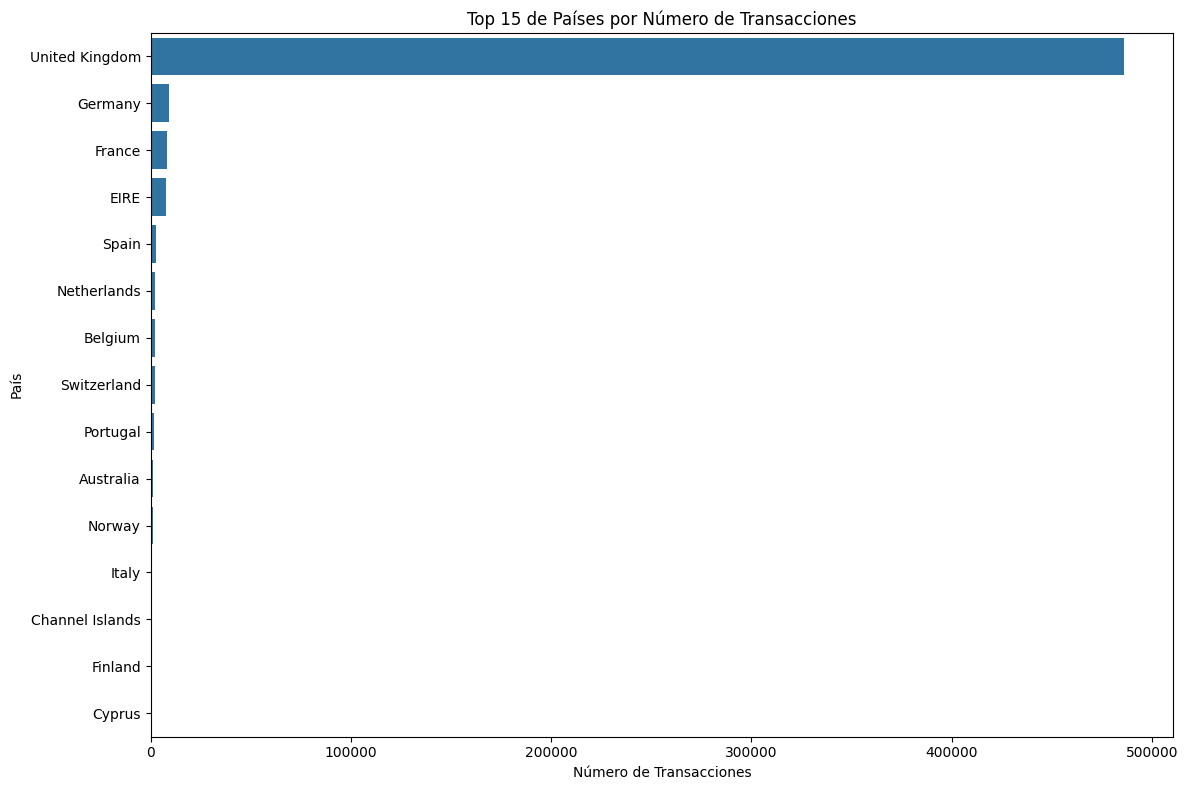

 Visualización 1 completada


In [13]:
# Visualización 1: Top 15 países por número de transacciones
print("Generando visualización 1: Top 15 países por transacciones...")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(y='Country', data=data, order=data['Country'].value_counts().index[:15])
plt.title('Top 15 de Países por Número de Transacciones')
plt.xlabel('Número de Transacciones')
plt.ylabel('País')
plt.tight_layout()
plt.show()

print(" Visualización 1 completada")

Generando visualización 2: Distribución de cantidades...


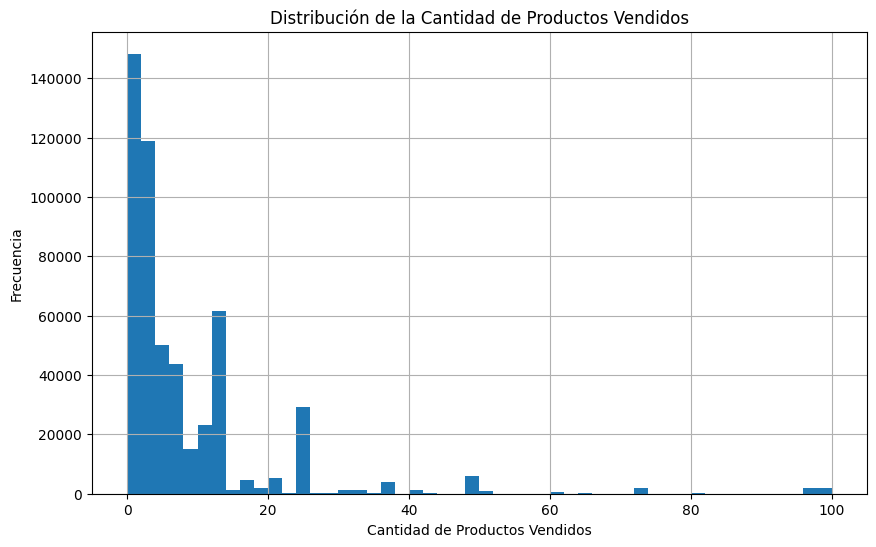

 Visualización 2 completada


In [15]:
# Visualización 2: Distribución de la cantidad de productos vendidos
print("Generando visualización 2: Distribución de cantidades...")

plt.figure(figsize=(10, 6))
data['Quantity'].hist(bins=50, range=(0, 100))
plt.xlabel('Cantidad de Productos Vendidos')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Cantidad de Productos Vendidos')
plt.show()

print(" Visualización 2 completada")

In [17]:
# Visualización interactiva con Plotly
print("Generando visualización interactiva con Plotly...")

import plotly.express as px

# Tomamos una muestra de 5000 filas para que el gráfico no sea demasiado pesado
sample_data = data.sample(n=5000, random_state=42)

fig = px.scatter(sample_data,
                 x="Quantity",
                 y="UnitPrice",
                 color="Country",
                 title="Relación entre Cantidad y Precio Unitario por País",
                 hover_data=['Description'])
fig.show()

print(" Visualización interactiva con Plotly completada")

Generando visualización interactiva con Plotly...


 Visualización interactiva con Plotly completada


In [21]:
# Visualización interactiva con Bokeh - VERSIÓN CORREGIDA
print("Generando visualización interactiva con Bokeh...")

from bokeh.plotting import figure, show
from bokeh.io import output_notebook, reset_output

# Configurar Bokeh para mostrar en Colab
reset_output()  # Limpiar salidas anteriores
output_notebook()  # Configurar para mostrar en el notebook

# Verificar que tenemos datos
print(f"Datos para graficar: {len(data)} filas")

# Convertir la columna InvoiceDate a datetime (si no está convertida)
if data['InvoiceDate'].dtype == 'object':
    data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Agrupar por fecha y sumar las cantidades vendidas
sales_per_date = data.groupby(data['InvoiceDate'].dt.date)['Quantity'].sum()

print(f"Puntos a graficar: {len(sales_per_date)}")

# Crear el gráfico de líneas
p = figure(title="Cantidad de Productos Vendidos por Fecha",
           x_axis_type="datetime",
           x_axis_label='Fecha',
           y_axis_label='Cantidad',
           width=800,
           height=400)

# Convertir índices a lista para Bokeh
dates = list(sales_per_date.index)
quantities = list(sales_per_date.values)

p.line(dates, quantities, legend_label="Ventas Diarias", line_width=2)

# Mostrar el gráfico
show(p)

print(" Visualización interactiva con Bokeh completada")

Generando visualización interactiva con Bokeh...
Datos para graficar: 531285 filas
Puntos a graficar: 305


 Visualización interactiva con Bokeh completada


In [22]:
# Guardar las versiones exactas de las bibliotecas instaladas
print("Creando requirements.txt con las versiones actuales...")

!pip freeze > requirements.txt

# Mostrar el contenido del archivo
print("Contenido de requirements.txt:")
!head -15 requirements.txt

print("\n requirements.txt creado correctamente")

Creando requirements.txt con las versiones actuales...
Contenido de requirements.txt:
absl-py==1.4.0
absolufy-imports==0.3.1
accelerate==1.10.1
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.0
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.17.0
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3

 requirements.txt creado correctamente


In [23]:
# Crear un requirements.txt más específico para nuestro proyecto
print("Creando requirements_actual.txt con las bibliotecas principales...")

librerias_principales = [
    "pandas", "numpy", "matplotlib", "seaborn",
    "plotly", "bokeh", "dash", "scikit-learn"
]

# Obtener las versiones específicas de estas bibliotecas
for lib in librerias_principales:
    !pip show {lib} | grep -E "Name|Version" | head -2

print("\n Información de bibliotecas principales obtenida")

Creando requirements_actual.txt con las bibliotecas principales...
Name: pandas
Version: 2.2.2
Name: numpy
Version: 2.0.2
Name: matplotlib
Version: 3.10.0
Name: seaborn
Version: 0.13.2
Name: plotly
Version: 5.24.1
Name: bokeh
Version: 3.7.3
Name: dash
Version: 3.2.0
Name: scikit-learn
Version: 1.6.1

 Información de bibliotecas principales obtenida
